## Imports

In [1]:
import skimage
from skimage import io
from skimage import color
import random
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

/Users/francescoperera/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## 2a. Load Image

In [2]:
#load image with skimage and convert to grayscale
monaLisa = skimage.io.imread("monaLisa.jpg")
grayScaleMonaLisa = color.rgb2gray(monaLisa)

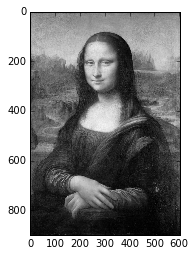

In [3]:
plt.imshow(grayScaleMonaLisa, cmap = cm.Greys_r)
plt.show()

(900, 604)


## 2b. Preprocessing the input

In [10]:
#the image has about 900 rows and 604 columns

def preProcessing(image):
    sampleData = []
    labels = []
    i =0
    while i < 5000:
        row = random.randint(0,image.shape[0]-1) # get 899 and 603 from image - Francesco
        col = random.randint(0,image.shape[1]-1)
        
        sampleData.append(image[row][col])
        labels.append([row,col])
        i+=1
        
    return sampleData,labels

In [11]:
sample,labels = preProcessing(grayScaleMonaLisa)

### 2c. Preprocess the output

No preprocessing needs to be done on the output as the input is already in grayscale format

## 2d. Rescale pixel

In [13]:
def rescalePixel(image):
    zeroOne = np.zeros(image.shape)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            zeroOne[i][j] = float(image[i][j])/255
    return zeroOne

In [14]:
rescaledImage = rescalePixel(grayScaleMonaLisa)

In [15]:
print rescaledImage[:100]

[[ 0.00173471  0.00153356  0.00166642 ...,  0.00143352  0.00174208
   0.00145534]
 [ 0.00173024  0.00169388  0.0016312  ...,  0.00108638  0.00128624
   0.00095774]
 [ 0.00137102  0.00164001  0.00161687 ...,  0.00114678  0.00121702
   0.00075338]
 ..., 
 [ 0.00183165  0.001902    0.00196142 ...,  0.00187802  0.0018287
   0.00127273]
 [ 0.00200414  0.00174165  0.00176809 ...,  0.00187238  0.00181875
   0.0012793 ]
 [ 0.00198993  0.00162968  0.00167588 ...,  0.00185916  0.00191534
   0.00141102]]


## 2e. Further preprocessing

No further preprocessing is needed

## 2f. Run Random Forest and show results

In [16]:
def randomForest(img,data,labels,estimators = None,depth = None):
    est = RandomForestRegressor(n_estimators=estimators,max_depth = depth)
    est = est.fit(labels,data)
    
    predictions = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            predictions.append([i,j])
    
    predicted = est.predict(predictions)
    predictedImage = predicted.reshape(img.shape)
    plt.imshow(predictedImage, cmap=cm.gray)
    

In [17]:
len(sample)

5000

In [18]:
len(labels)

5000

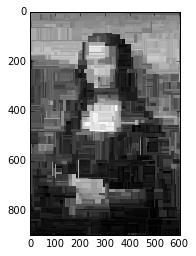

In [19]:
randomForest(grayScaleMonaLisa,sample,labels,1)

## 2g. Experimentation

### 2g.a  Run random forests with single estimator but with depth ( 1,2,3,5,10,15)

####  Depth = 1

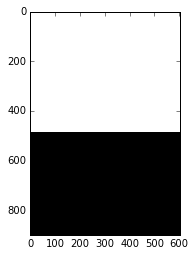

In [20]:
randomForest(grayScaleMonaLisa,sample,labels,1,1)

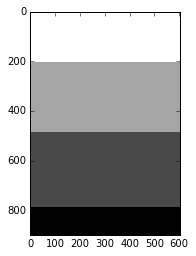

In [21]:
randomForest(grayScaleMonaLisa,sample,labels,1,2)

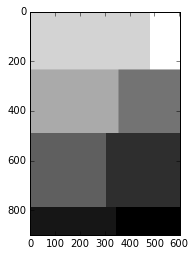

In [22]:
randomForest(grayScaleMonaLisa,sample,labels,1,3)

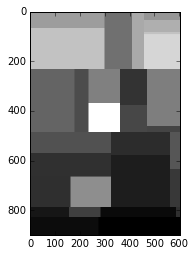

In [23]:
randomForest(grayScaleMonaLisa,sample,labels,1,5)

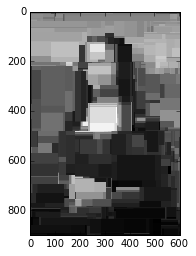

In [24]:
randomForest(grayScaleMonaLisa,sample,labels,1,10)

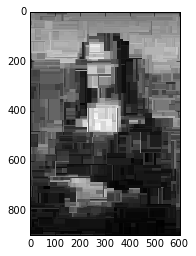

In [25]:
randomForest(grayScaleMonaLisa,sample,labels,1,15)

### 2g.b Run random forests with  a depth of 7 but different number of estimators/trees ( 1,3,5,10,100)

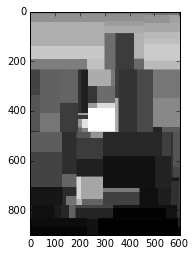

In [26]:
randomForest(grayScaleMonaLisa,sample,labels,1,7)

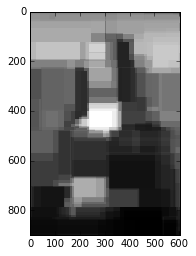

In [27]:
randomForest(grayScaleMonaLisa,sample,labels,3,7)

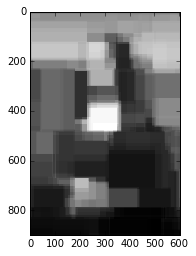

In [28]:
randomForest(grayScaleMonaLisa,sample,labels,5,7)

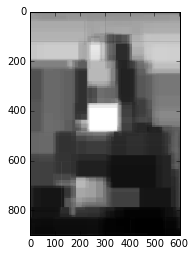

In [29]:
randomForest(grayScaleMonaLisa,sample,labels,10,7)

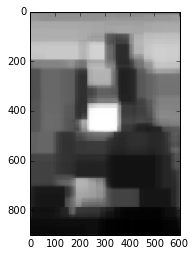

In [30]:
randomForest(grayScaleMonaLisa,sample,labels,100,7)

### 2g.c Repeat experiment with a k-NN regressor with k = 1

In [31]:
def kNN(img,sampleData,labels,k):
    reg = KNeighborsRegressor(k)
    reg = reg.fit(labels,sampleData)
    
    predictions = []
    for i in range(900):
        for j in range(604):
            predictions.append([i,j])
    
    predicted = reg.predict(predictions)
    predictedImage = predicted.reshape(900,604)
    plt.imshow(predictedImage, cmap=cm.gray)

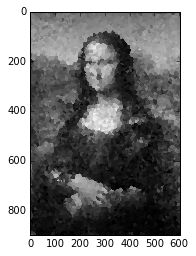

In [32]:
kNN(grayScaleMonaLisa,sample,labels,1)

### 2g.d Experiment with different pruning strategies

In [59]:
#The number of trees was proven to be a more incisive factor than the depth of the forest.

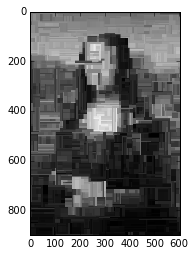

In [34]:
randomForest(grayScaleMonaLisa,sample,labels,1)

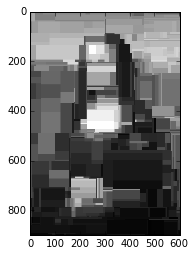

In [37]:
randomForest(grayScaleMonaLisa,sample,labels,1,10)

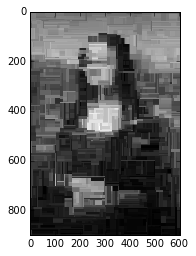

In [38]:
randomForest(grayScaleMonaLisa,sample,labels,1,20)

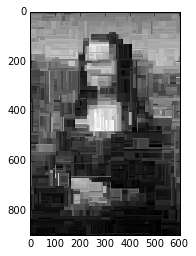

In [39]:
randomForest(grayScaleMonaLisa,sample,labels,1,30)

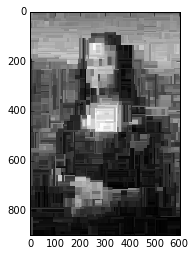

In [40]:
randomForest(grayScaleMonaLisa,sample,labels,1,40)

Source : Source:http://stats.stackexchange.com/questions/36298/why-is-pruning-not-needed-for-random-forest-trees/36306.\\
Note that this source also quotes Hastie.
However in researching the topic, we found that pruning is not needed for random forest for 2 reasons:
- Trees in Random Forest are "bootstrapped" or the training set that receive are randomly picked.
- Each tree trains on random features thus there is no strong correlation ( if any at all) between them.

## 2h. Analysis

a. The decision rule at a split point is represented as a one-level decision tree. In this scenario, the one-level decision tree has to decide whetehr the value x or y is bigger or smaller than a certain value whose range is between 0 and 255.

If we use j to represent the splitting variable ( the coordinates  of the image) and  s for the split point,then we can get two equations for 2 half planes:

R_1(j,s) = {X|X_j<=s} and R_2(j,s)={X|X_j>s}

b. In a random forest, each leaf in a tree corresponds to a mean squared error based regression function. It averages all x and y values that "fall" into the leaf. Thus, color patches occur because there is no additional data to differentiate pixels in those areas.

c. 2 ^ depth

d. between 2^depth and n*(2^depth)